# Introduction

This notebook is an implementation of Dr. Jón Daníelsson's _Financial Risk Forecasting_ (Wiley, 2011) in R 3.4.3, with annotations and introductory examples. The introductory examples (Appendix) are similar to Appendix B in the original book.

Bullet point numbers correspond to the R/MATLAB Listing numbers in the original book, referred to henceforth as _FRF_.

More details can be found at the book website: https://www.financialriskforecasting.com/

Last updated: June 2018

Copyright 2011, 2016, 2018 Jon Danielsson. This code is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This code is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. The GNU General Public License is available at: https://www.gnu.org/licenses/.

# Appendix: An Introduction to R

Created in R 3.4.3 (June 2018)

-  R.1: Entering and Printing Data
-  R.2: Vectors, Matrices and Sequences
-  R.3: Importing Data (to be updated)
-  R.4: Basic Summary Statistics
-  R.5: Calculating Moments
-  R.6: Basic Matrix Operations
-  R.7: Statistical Distributions
-  R.8: Statistical Tests
-  R.9: Time Series
-  R.10: Loops and Functions
-  R.11: Basic Graphs
-  R.12: Miscellaneous Useful Functions

In [1]:
# Entering and Printing Data in R
# Listing R.1
# Last updated June 2018
#
#

x = 10             # assign x the value 10
print(x)           # print x

[1] 10


In [2]:
# Vectors, Matrices and Sequences in R
# Listing R.2
# Last updated June 2018
#
#

y = c(1,3,5,7,9)          # create vector using c()

print(y)

print(y[3])               # calling 3rd element (R indices start at 1)

print(dim(y))             # gives NULL since y is a vector, not a matrix

print(length(y))          # as expected, y has length 5

v = matrix(nrow=2,ncol=3) # fill a 2 x 3 matrix with NaN values (default)

print(dim(v))             # as expected, v is size (2,3)

w = matrix(c(1,2,3),nrow=6,ncol=3) # repeats matrix twice by rows, thrice by columns

print(w)

s = 1:10                  # s is a list of integers from 1 to 10 inclusive

print(s)                  

[1] 1 3 5 7 9
[1] 5
NULL
[1] 5
[1] 2 3
     [,1] [,2] [,3]
[1,]    1    1    1
[2,]    2    2    2
[3,]    3    3    3
[4,]    1    1    1
[5,]    2    2    2
[6,]    3    3    3
 [1]  1  2  3  4  5  6  7  8  9 10


In [3]:
# Importing Data in R
# Listing R.3
# Last updated June 2018
#
#

## There are many data sources for financial data, for instance
## Yahoo Finance, AlphaVantage and Quandl. However, some of the
## free data sources have numerous issues with accuracy and
## handling of missing data, so only CSV importing is shown here.
##
## For csv data, one can use read.csv to read it
##
## Example:
## data = read.csv('Ch1aprices.csv', header=TRUE, sep=',')
## one can use the zoo() function from the package zoo
## to turn the data into a timeseries (see Listing 1.1/1.2)

In [4]:
# Basic Summary Statistics in R
# Listing R.4
# Last updated June 2018
#
#

y=matrix(c(3.1,4.15,9))

sum(y)         # sum of all elements of y
prod(y)        # product of all elements of y
max(y)         # maximum value of y
min(y)         # minimum value of y
range(y)       # min, max value of y
mean(y)        # arithmetic mean
median(y)      # median
var(y)         # variance
cov(y)         # covar matrix = variance for single vector
cor(y)         # corr matrix = [1] for single vector
sort(y)        # sorting in ascending order
log(y)         # natural log

[1] 16.25

[1] 115.785

[1] 9

[1] 3.1

[1] 3.1 9.0

[1] 5.416667

[1] 4.15

9.905833


9.905833


1


[1] 3.10 4.15 9.00

1.131402
1.423108
2.197225


In [5]:
# Calculating Moments in R
# Listing R.5
# Last updated June 2018
#
#

library(moments)

mean(y)      # mean
var(y)       # variance
sd(y)        # unbiased standard deviation, by default
skewness(y)  # skewness
kurtosis(y)  # kurtosis

[1] 5.416667

9.905833


[1] 3.147353

[1] 0.6196029

[1] 1.5

In [6]:
# Basic Matrix Operations in R
# Listing R.6
# Last updated June 2018
#
#

z = matrix(c(1,2,3,4),2,2)   # z is a 2 x 2 matrix
x = matrix(c(1,2),1,2)       # x is a 1 x 2 matrix

## Note: z * x is undefined since the two matrices are not conformable

z %*% t(x)                   # this evaluates to a 2 x 1 matrix

rbind(z,x)                   # "stacking" z and x vertically
cbind(z,t(x))                # "stacking z and x' horizontally

## Note: dimensions must match along the combining axis

7
10


1,3
2,4
1,2


1,3,1
2,4,2


In [7]:
# Statistical Distributions in R
# Listing R.7
# Last updated June 2018
#
#


q = seq(from = -3, to = 3, length = 7)     # specify a set of values

p = seq(from = 0.1, to = 0.9, length = 9)  # specify a set of probabilities

qnorm(p, mean = 0, sd = 1)                 # element-wise inverse Normal quantile

pt(q, df = 4)                              # element-wise cdf under Student-t(4)

dchisq(q, df = 2)                          # element-wise pdf under Chisq(2)

## Similar syntax for other distributions
## q for quantile, p for cdf, d for pdf
## followed by the abbreviation of the distribution

## One can also obtain pseudorandom samples from distributions

x = rt(100, df = 5)                        # Sampling 100 times from TDist with 5 df

y = rnorm(50, mean = 0, sd = 1)            # Sampling 50 times from a standard normal 

## Given data, we obtain MLE estimates of distribution parameters with package MASS:

library(MASS)

res = fitdistr(x, densfun = "normal")      # Fitting x to normal dist

print(res)

[1] -1.2815516 -0.8416212 -0.5244005 -0.2533471  0.0000000  0.2533471  0.5244005
[8]  0.8416212  1.2815516

[1] 0.01997098 0.05805826 0.18695048 0.50000000 0.81304952 0.94194174 0.98002902

[1] 0.0000000 0.0000000 0.0000000 0.5000000 0.3032653 0.1839397 0.1115651

      mean          sd    
  0.02829141   1.42600592 
 (0.14260059) (0.10083385)


In [8]:
# Statistical Tests in R
# Listing R.8
# Last updated June 2018
#
#

library(tseries)

x = rt(500, df = 5)                            # Create hypothetical dataset x

jarque.bera.test(x)                            # Jarque-Bera test for normality
Box.test(x, lag = 20, type = c("Ljung-Box"))   # Ljung-Box test for serial correlation


	Jarque Bera Test

data:  x
X-squared = 48.511, df = 2, p-value = 2.924e-11



	Box-Ljung test

data:  x
X-squared = 21.823, df = 20, p-value = 0.3502


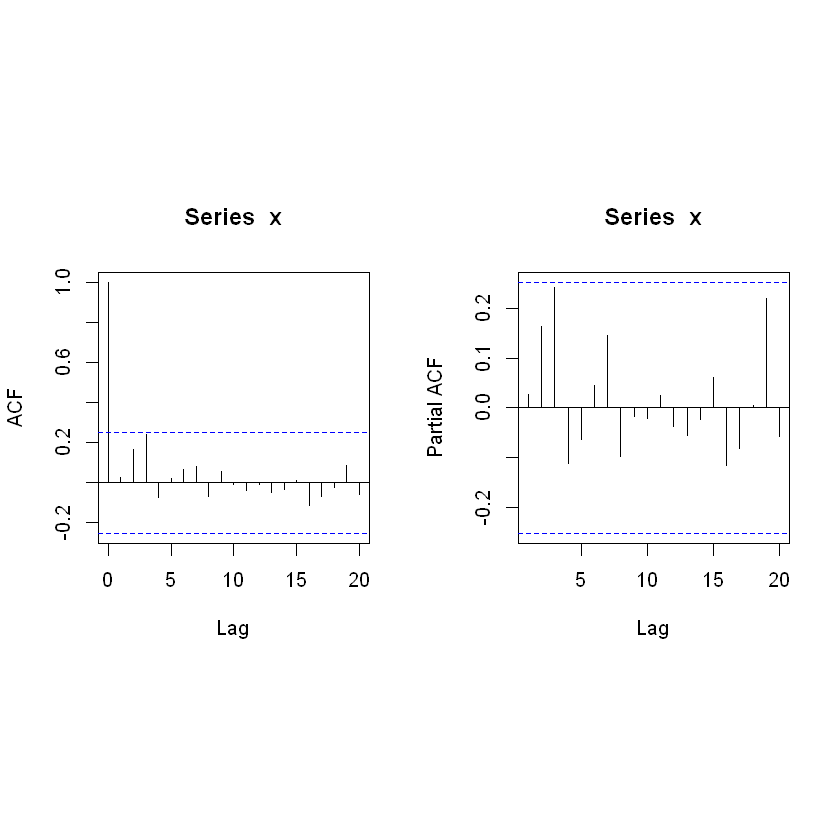

In [9]:
# Time Series in R
# Listing R.9
# Last updated June 2018
#
#

x = rt(60, df = 5)  # Create hypothetical dataset x

par(mfrow=c(1,2), pty='s')

acf(x,20)           # autocorrelation for lags 1:20
pacf(x,20)          # partial autocorrelation for lags 1:20

In [10]:
# Loops and Functions in R
# Listing R.10
# Last updated June 2018
#
#

## For loops

for (i in 3:7)        # iterates through [3,4,5,6,7]
    print(i^2)      

## If-else loops

X = 10

if (X %% 3 == 0) {
    print("X is a multiple of 3")
} else {
    print("X is not a multiple of 3")
}
    
## Functions (example: a simple excess kurtosis function)

excess_kurtosis = function(x, excess = 3){ # note: excess optional, default=3
    m4 = mean((x-mean(x))^4)
    excess_kurt = m4/(sd(x)^4) - excess
    excess_kurt
}

x = rt(60, df = 5)                         # Create hypothetical dataset x

excess_kurtosis(x)      

[1] 9
[1] 16
[1] 25
[1] 36
[1] 49
[1] "X is not a multiple of 3"


[1] 2.974856

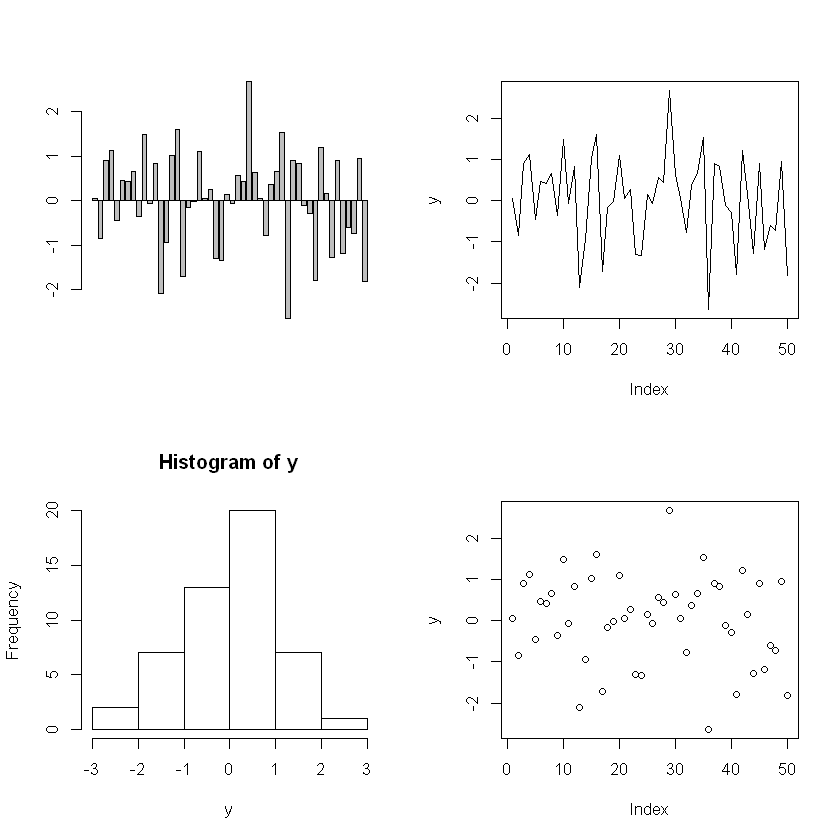

In [11]:
# Basic Graphs in R
# Listing R.11
# Last updated June 2018
#
#

y = rnorm(50, mean = 0, sd = 1)

par(mfrow=c(2,2)) # sets up space for subplots

barplot(y)        # bar plot
plot(y,type='l')  # line plot
hist(y)           # histogram
plot(y)           # scatter plot

In [12]:
# Miscellaneous Useful Functions in R
# Listing R.12
# Last updated June 2018
#
#

## Convert objects from one type to another with as.integer() etc
## To check type, use typeof(object)

x = 8.0

print(typeof(x))

x = as.integer(x)

print(typeof(x))

[1] "double"
[1] "integer"


# Chapter 1: Financial Markets, Prices and Risk

-  1.1: Loading hypothetical stock prices, converting to returns, plotting returns
-  1.3: Summary statistics for returns timeseries
-  1.5: Autocorrelation function (ACF) plots, Ljung-Box test
-  1.7: Quantile-Quantile (QQ) plots
-  1.9: Correlation matrix between different stocks

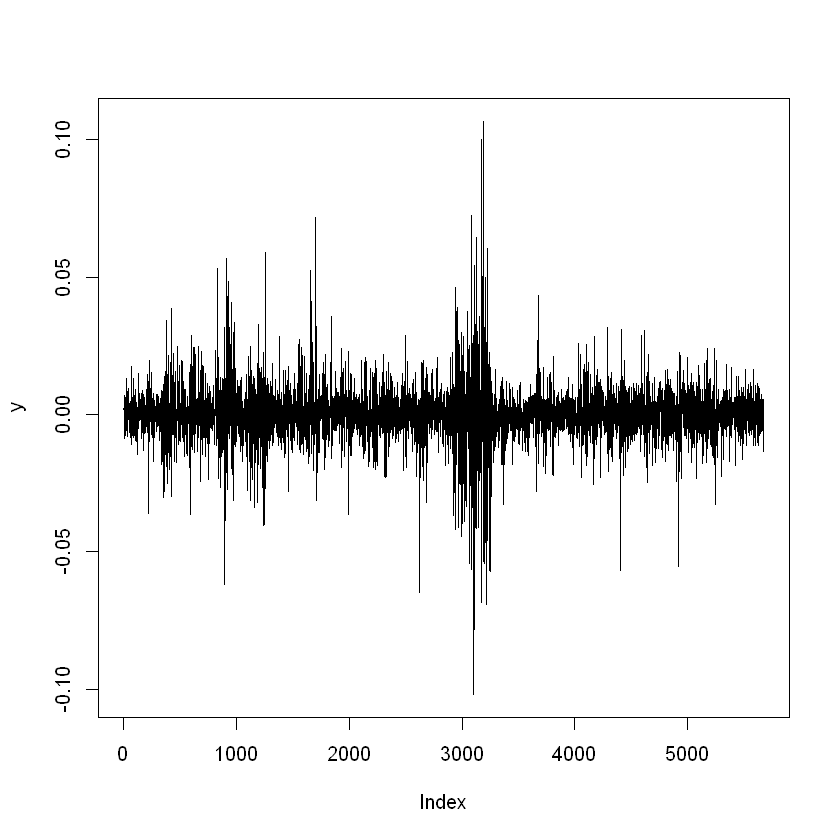

In [13]:
# Download S&P500 data in R
# Listing 1.1
# Last updated June 2018
#
#

library(tseries)
library(zoo)


 
price = zoo(read.csv('index.csv', header=TRUE, sep=','))
y=diff(log(price))  # calculate returns
plot(y)             # plot returns
y=coredata(y)       # get core data

[1] 0.0002581599

[1] 0.01000573

[1] -0.1019555

[1] 0.1067359

Index 
0.1526333

Index 
16.98117

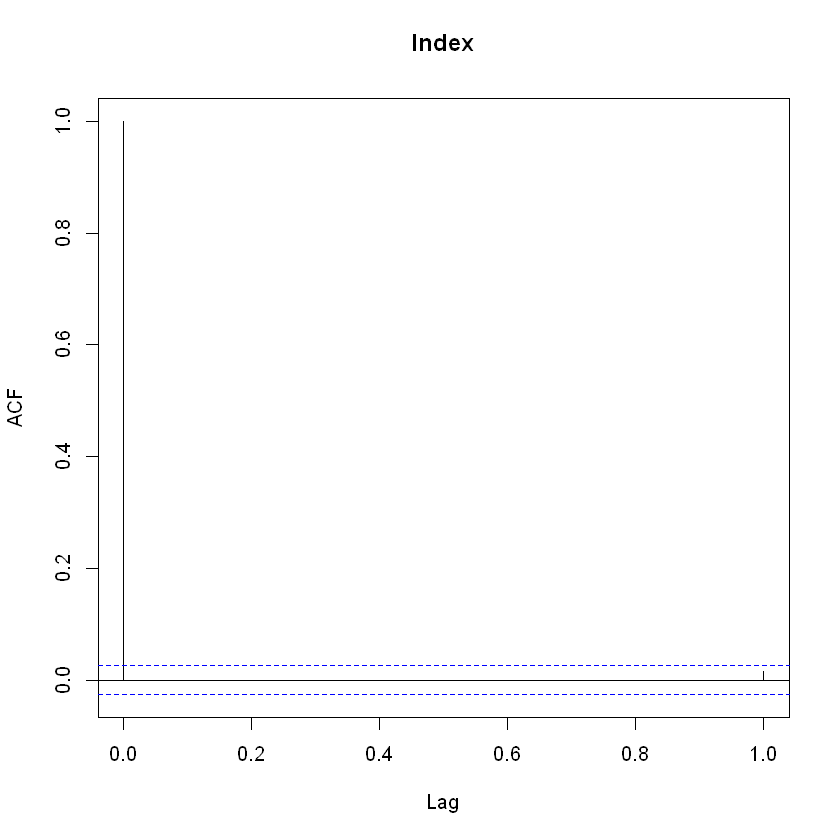


	Jarque Bera Test

data:  y
X-squared = 46251, df = 2, p-value < 2.2e-16



	Box-Ljung test

data:  y
X-squared = 93.488, df = 20, p-value = 1.809e-11



	Box-Ljung test

data:  y^2
X-squared = 2543, df = 20, p-value < 2.2e-16


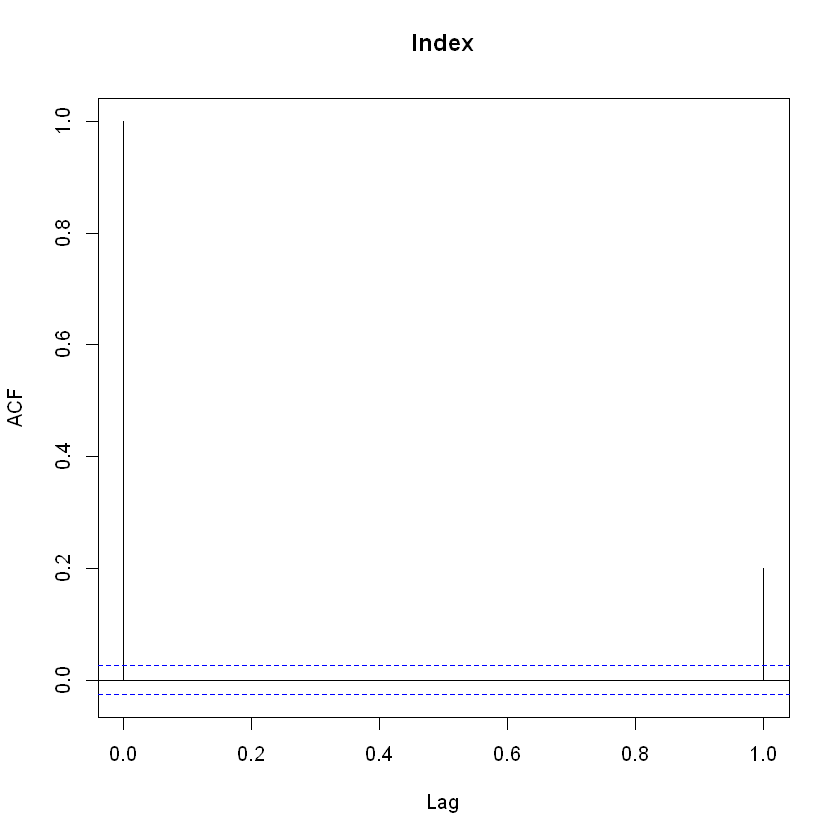

In [14]:
# Sample statistics in R
# Listing 1.3
# Last updated June 2018
#
#

library(moments)

mean(y)
sd(y)
min(y)
max(y)
skewness(y)
kurtosis(y)
acf(y,1)
acf(y^2,1)
jarque.bera.test(y)
Box.test(y, lag = 20, type = c("Ljung-Box"))
Box.test(y^2, lag = 20, type = c("Ljung-Box"))

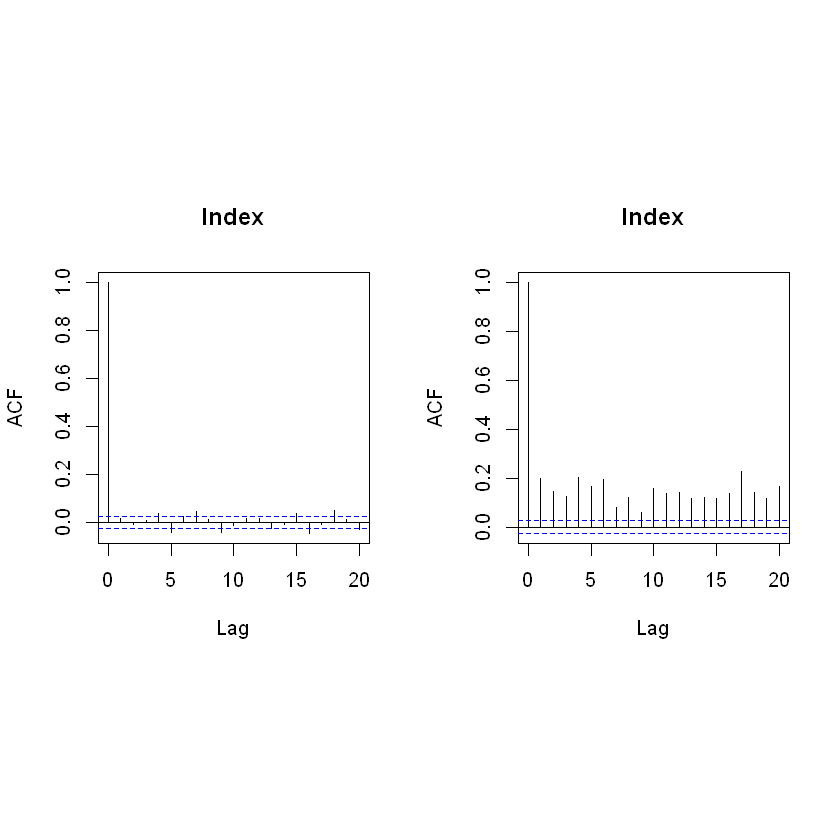

In [15]:
# ACF plots and the Ljung-Box test in R
# Listing 1.5
# Last updated June 2018
#
#

library(MASS)
library(stats)

par(mfrow=c(1,2), pty="s")
q = acf(y,20)
q1 = acf(y^2,20)

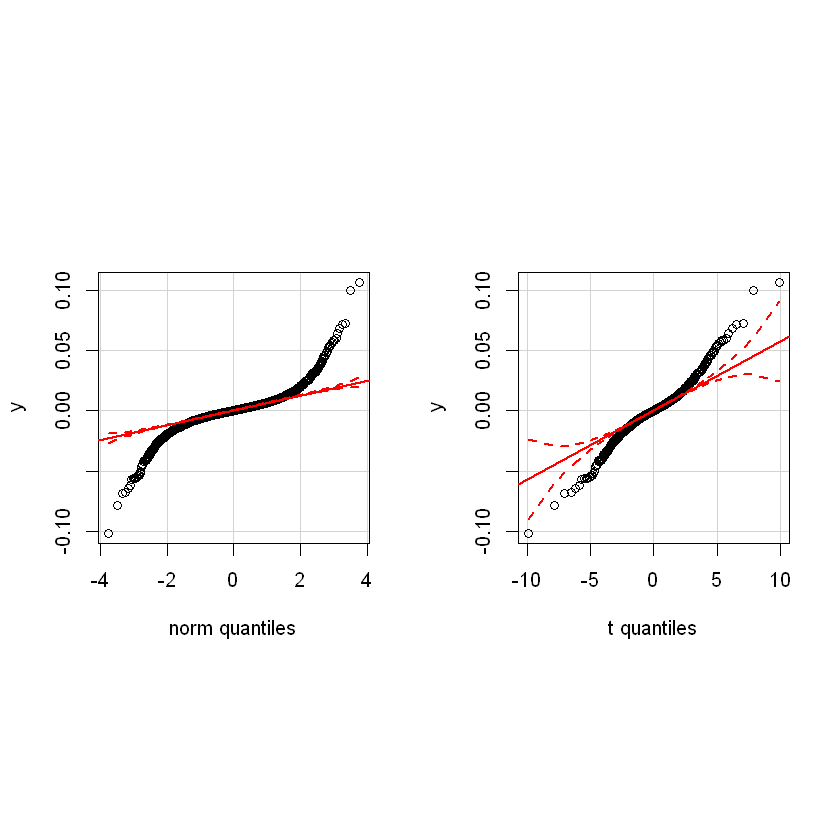

In [16]:
# QQ plots in R
# Listing 1.7
# Last updated June 2018
#
#

library(car)

par(mfrow=c(1,2), pty="s")

qqPlot(y)
qqPlot(y,distribution="t",df=5)

In [17]:
# Download stock prices in R
# Listing 1.9
# Last updated June 2018
#
#

p = ts(read.csv('stocks.csv',header=TRUE,sep=','))

y=diff(log(p))
print(cor(y)) # correlation matrix

          A         B         C
A 1.0000000 0.2296842 0.2126192
B 0.2296842 1.0000000 0.1450511
C 0.2126192 0.1450511 1.0000000


# Chapter 2: Univariate Volatility Modelling

-  2.1: GARCH and t-GARCH estimation
-  2.3: APARCH estimation

In [18]:
# ARCH and GARCH estimation in R
# Listing 2.1
# Last updated June 2018
#
#

library(tseries)

p = zoo(read.csv('index.csv', header=TRUE, sep=','))
y=diff(log(p))*100
y=y-mean(y)

## We multiply returns by 100 and de-mean them

library(fGarch)

garchFit(~ garch(1,0), data = y,include.mean=FALSE)
garchFit(~ garch(4,0), data = y,include.mean=FALSE)
garchFit(~ garch(4,1), data = y,include.mean=FALSE)
garchFit(~ garch(1,1), data = y,include.mean=FALSE,cond.dist="std",trace=F)
res=garchFit(~ garch(1,1), data = y,include.mean=FALSE,cond.dist="sstd",trace=F)
## plot(res)  

## plot(res) shows various graphical analysis, works in command line


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 0)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 0
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          5676
 Recursion Init:            mci
 Series Scale:              1.000573

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                       U            V params includes
    mu     -1.977953e-17 1.977953e-17    0.0    FALSE
    omega   1.000000e-06 1.000000e+02    0.1     TRUE
    alpha1  1.000000e-08 1.000000e+00    0.1     TRUE
    gamma1 -1.000000e+00 1.000000e+00    0.1    FALSE
    delta   0.000000e+00 2.000000e+00    2.0  


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 0), data = y, include.mean = FALSE) 

Mean and Variance Equation:
 data ~ garch(1, 0)
<environment: 0x00000000256dcba8>
 [data = y]

Conditional Distribution:
 norm 

Coefficient(s):
  omega   alpha1  
0.68467  0.34030  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega    0.68467     0.01660    41.25   <2e-16 ***
alpha1   0.34030     0.02647    12.86   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -7670.624    normalized:  -1.351414 

Description:
 Thu Jul 05 09:39:31 2018 by user: fanj5 



Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(4, 0)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               4 0
 Max GARCH Order:           4
 Maximum Order:             4
 Conditional Dist:          norm
 h.start:                   5
 llh.start:                 1
 Length of Series:          5676
 Recursion Init:            mci
 Series Scale:              1.000573

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                       U            V params includes
    mu     -1.977953e-17 1.977953e-17  0.000    FALSE
    omega   1.000000e-06 1.000000e+02  0.100     TRUE
    alpha1  1.000000e-08 1.000000e+00  0.025     TRUE
    alpha2  1.000000e-08 1.000000e+00  0.025     TRUE
    alpha3  1.000000e-08 1.000000e+00  0.025  


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(4, 0), data = y, include.mean = FALSE) 

Mean and Variance Equation:
 data ~ garch(4, 0)
<environment: 0x0000000026460d38>
 [data = y]

Conditional Distribution:
 norm 

Coefficient(s):
  omega   alpha1   alpha2   alpha3   alpha4  
0.38986  0.17833  0.15352  0.17058  0.14287  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega    0.38986     0.01467   26.569  < 2e-16 ***
alpha1   0.17833     0.01933    9.223  < 2e-16 ***
alpha2   0.15352     0.01897    8.094 6.66e-16 ***
alpha3   0.17058     0.02113    8.073 6.66e-16 ***
alpha4   0.14287     0.01742    8.201 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -7279.404    normalized:  -1.282488 

Description:
 Thu Jul 05 09:39:32 2018 by user: fanj5 



Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(4, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               4 1
 Max GARCH Order:           4
 Maximum Order:             4
 Conditional Dist:          norm
 h.start:                   5
 llh.start:                 1
 Length of Series:          5676
 Recursion Init:            mci
 Series Scale:              1.000573

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                       U            V params includes
    mu     -1.977953e-17 1.977953e-17  0.000    FALSE
    omega   1.000000e-06 1.000000e+02  0.100     TRUE
    alpha1  1.000000e-08 1.000000e+00  0.025     TRUE
    alpha2  1.000000e-08 1.000000e+00  0.025     TRUE
    alpha3  1.000000e-08 1.000000e+00  0.025  


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(4, 1), data = y, include.mean = FALSE) 

Mean and Variance Equation:
 data ~ garch(4, 1)
<environment: 0x0000000024f721b8>
 [data = y]

Conditional Distribution:
 norm 

Coefficient(s):
     omega      alpha1      alpha2      alpha3      alpha4       beta1  
0.01340442  0.04586097  0.02579384  0.00000001  0.00000001  0.91451944  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega  1.340e-02   1.860e-03    7.208 5.68e-13 ***
alpha1 4.586e-02   1.160e-02    3.955 7.66e-05 ***
alpha2 2.579e-02   1.532e-02    1.683   0.0923 .  
alpha3 1.000e-08   2.043e-02    0.000   1.0000    
alpha4 1.000e-08   1.735e-02    0.000   1.0000    
beta1  9.145e-01   6.801e-03  134.472  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -6969.51    normalized:  -1.227891 

Description:
 Thu Jul 05 09:39:33 2018 by user: fanj5 



Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = y, cond.dist = "std", 
    include.mean = FALSE, trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x0000000026709118>
 [data = y]

Conditional Distribution:
 std 

Coefficient(s):
   omega    alpha1     beta1     shape  
0.017738  0.080087  0.903693  3.915327  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega   0.017738    0.003114    5.697 1.22e-08 ***
alpha1  0.080087    0.009024    8.875  < 2e-16 ***
beta1   0.903693    0.009440   95.730  < 2e-16 ***
shape   3.915327    0.215269   18.188  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -6553.022    normalized:  -1.154514 

Description:
 Thu Jul 05 09:39:33 2018 by user: fanj5 


In [19]:
# Advanced ARCH and GARCH estimation in R
# Listing 2.3
# Last updated June 2018
#
#

## normal APARCH(1,1)
print(garchFit(~ aparch(1,1),data=y,include.mean=FALSE,trace=F)) 
## fixing delta at 2 (or to any value)
print(garchFit(~ aparch(1,1),data=y,include.mean=FALSE,trace=F,include.delta=F,delta=2))
## Student-t conditional distribution
print(garchFit(~ aparch(1,1),data=y,include.mean=FALSE,cond.dist="std",trace=F))
## normal APARCH(2,2)
print(garchFit(~ aparch(2,2),data=y,include.mean=FALSE,trace=F))


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~aparch(1, 1), data = y, include.mean = FALSE, 
    trace = F) 

Mean and Variance Equation:
 data ~ aparch(1, 1)
<environment: 0x00000000256b9040>
 [data = y]

Conditional Distribution:
 norm 

Coefficient(s):
    omega     alpha1     gamma1      beta1      delta  
0.0130295  0.0680740  0.0093648  0.9181769  2.0000000  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega   0.013029    0.001691    7.707 1.29e-14 ***
alpha1  0.068074    0.007012    9.708  < 2e-16 ***
gamma1  0.009365    0.031768    0.295    0.768    
beta1   0.918177    0.005419  169.436  < 2e-16 ***
delta   2.000000    0.174164   11.483  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 -6970.276    normalized:  -1.228026 

Description:
 Thu Jul 05 09:39:36 2018 by user: fanj5 


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~aparch(1, 1), data = y, delta = 2, 

# Chapter 3: Multivariate Volatility Models

-  3.1: Loading hypothetical stock prices
-  3.3: EWMA estimation
-  3.5: OGARCH estimation
-  3.7: DCC estimation
-  3.9: Comparison of EWMA, OGARCH, DCC

In [20]:
# Download stock prices in R
# Listing 3.1
# Last updated 2011
#
#

library(tseries)
library(zoo)

p = zoo(read.csv('stocks.csv',header=TRUE,sep=','))
y = diff(log(p))*100       # calculate returns
y = y[,1:2]                # consider first two stocks
y[,1] = y[,1]-mean(y[,1])  # subtract mean
y[,2] = y[,2]-mean(y[,2])
TT = length(y[,1])

In [21]:
# EWMA in R
# Listing 3.3
# Last updated August 2016
#
#

## create a matrix to hold covariance matrix for each t
EWMA = matrix(nrow=TT,ncol=3)   
lambda = 0.94
S = cov(y)                      # initial (t=1) covar matrix
EWMA[1,] = c(S)[c(1,4,2)]       # extract var and covar
for (i in 2:TT){                # loop though sample
  S = lambda*S+(1-lambda)*t(y[i-1]) %*% y[i-1]
  EWMA[i,] = c(S)[c(1,4,2)]     # convert matrix to vector
}
EWMArho = EWMA[,3]/sqrt(EWMA[,1]*EWMA[,2]) # calculate correlations

print(head(EWMArho))
print(tail(EWMArho))

[1] 0.2296842 0.2236347 0.2218277 0.2270681 0.2054204 0.1992979
[1] 0.1931994 0.1914987 0.2177147 0.3436632 0.3122741 0.3159703


In [22]:
# OGARCH in R
# Listing 3.5
# Last updated 2011
#
#

library(gogarch, quietly = TRUE)

res = gogarch(y,formula = ~garch(1,1),garchlist = c(include.mean=FALSE))
OOrho = ccor(res)

## OOrho is a vector of correlations


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          5676
 Recursion Init:            mci
 Series Scale:              1.547394

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                       U            V params includes
    mu     -2.439722e-17 2.439722e-17    0.0    FALSE
    omega   1.000000e-06 1.000000e+02    0.1     TRUE
    alpha1  1.000000e-08 1.000000e+00    0.1     TRUE
    gamma1 -1.000000e+00 1.000000e+00    0.1    FALSE
    beta1   1.000000e-08 1.000000e+00    0.8  

In [23]:
# DCC in R
# Listing 3.7
# Last updated 2011
#
#

library(ccgarch)  

## estimate univariate GARCH models to get starting values

f1 = garchFit(~ garch(1,1), data=y[,1],include.mean=FALSE)
f1 = f1@fit$coef
f2 = garchFit(~ garch(1,1), data=y[,2],include.mean=FALSE)
f2 = f2@fit$coef

## create vectors and matrices of starting values 
a = c(f1[1], f2[1])
A = diag(c(f1[2],f2[2]))
B = diag(c(f1[3], f2[3])) 
dccpara = c(0.2,0.6) 

## estimate the model
dccresults=dcc.estimation(inia=a,iniA=A,iniB=B,ini.dcc=dccpara,dvar=y,model="diagonal")

## Parameter estimates and their robust standard errors in dcc.results$out
DCCrho = dccresults$DCC[,2]


Series Initialization:
 ARMA Model:                arma
 Formula Mean:              ~ arma(0, 0)
 GARCH Model:               garch
 Formula Variance:          ~ garch(1, 1)
 ARMA Order:                0 0
 Max ARMA Order:            0
 GARCH Order:               1 1
 Max GARCH Order:           1
 Maximum Order:             1
 Conditional Dist:          norm
 h.start:                   2
 llh.start:                 1
 Length of Series:          5676
 Recursion Init:            mci
 Series Scale:              0.6426198

Parameter Initialization:
 Initial Parameters:          $params
 Limits of Transformations:   $U, $V
 Which Parameters are Fixed?  $includes
 Parameter Matrix:
                       U            V params includes
    mu     -1.669935e-16 1.669935e-16    0.0    FALSE
    omega   1.000000e-06 1.000000e+02    0.1     TRUE
    alpha1  1.000000e-08 1.000000e+00    0.1     TRUE
    gamma1 -1.000000e+00 1.000000e+00    0.1    FALSE
    beta1   1.000000e-08 1.000000e+00    0.8 

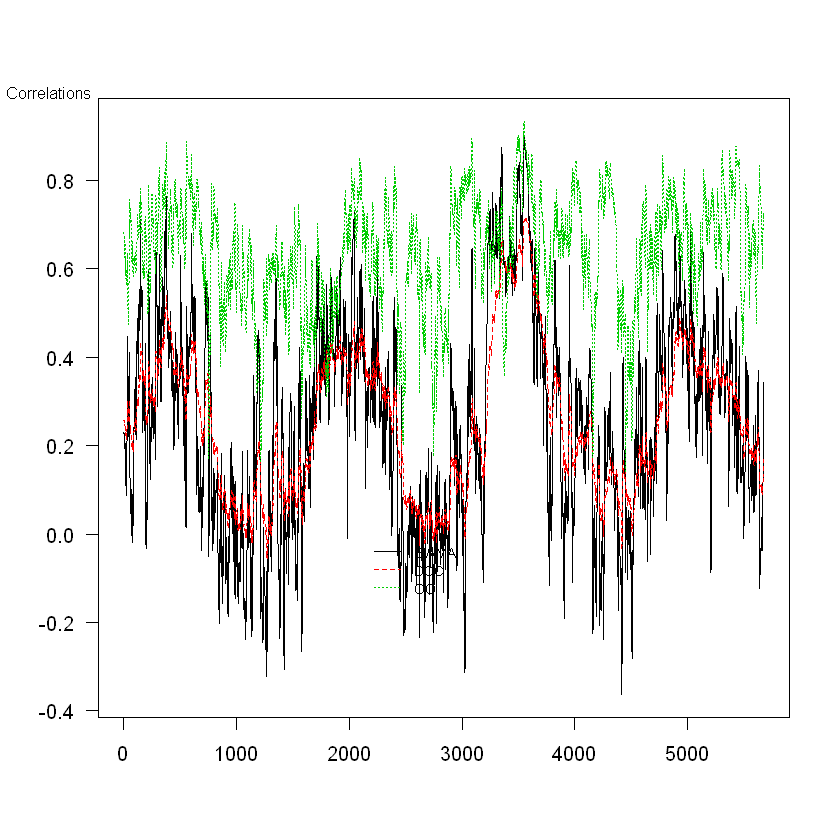

In [24]:
# Sample statistics in R
# Listing 3.9
# Last updated 2011
#
#

matplot(cbind(EWMArho,DCCrho,OOrho),type='l',las=1,lty=1:3,col=1:3,ylab="")
mtext("Correlations",side=2,line=0.3,at=1,las=1,cex=0.8)
legend(2100,0,c("EWMA","DCC","OO"),lty=1:3,col=1:3,bty="n",cex=0.7)

# Chapter 4: Risk Measures

-  4.1: Expected Shortfall (ES) estimation under normality assumption

In [25]:
# ES in R
# Listing 4.1
# Last updated August 2016
#
#

p = c(0.5,0.1,0.05,0.025,0.01,0.001)
VaR = -qnorm(p)
ES = dnorm(qnorm(p))/p

print(ES)

[1] 0.7978846 1.7549833 2.0627128 2.3378028 2.6652142 3.3670901


# Chapter 5: Implementing Risk Forecasts

-  5.1: Loading hypothetical stock prices, converting to returns
-  5.3: Univariate HS Value at Risk (VaR)
-  5.5: Multivariate HS VaR
-  5.7: Univariate ES VaR
-  5.9: Normal VaR
-  5.11: Portfolio Normal VaR
-  5.13: Student-t VaR
-  5.15: Normal ES VaR
-  5.17: Direct Integration Normal ES VaR
-  5.19: MA Normal VaR
-  5.21: EWMA VaR
-  5.23: Two-asset EWMA VaR
-  5.25: GARCH(1,1) VaR

In [26]:
# Download stock prices in R
# Listing 5.1
# Last updated August 2016
#
#

library(tseries)
library(zoo)

prices = zoo(read.csv('stocks.csv',header=TRUE,sep=','))
## convert prices of first two stocks to returns and adjust length
y1=tail(diff(log(coredata(prices[,1]))),4100)
y2=tail(diff(log(coredata(prices[,2]))),4100)
TT=length(y1)
y=cbind(y1,y2)
value = 1000 # portfolio value
p = 0.01     # probability

In [27]:
# Univariate HS in R
# Listing 5.3
# Last updated August 2016
#
#

ys = sort(y1) # sort returns
op = TT*p     # p percent smallest
VaR1 = -ys[op]*value

print(VaR1)

[1] 18.65861


In [28]:
# Multivariate HS in R
# Listing 5.5
# Last updated 2011
#
#

w = matrix(c(0.3,0.7)) # vector of portfolio weights
yp = y %*% w           # obtain portfolio returns
yps = sort(yp)
VaR2 = -yps[op]*value

print(VaR2)

[1] 19.81446


In [29]:
# Univariate ES in R
# Listing 5.7
# Last updated 2011
#
#

ES1 = -mean(ys[1:op])*value

print(ES1)

[1] 23.87292


In [30]:
# Normal VaR in R
# Listing 5.9
# Last updated 2011
#
#

sigma = sd(y1) # estimate volatility
VaR3 = -sigma * qnorm(p) * value

print(VaR3)

[1] 15.588


In [31]:
# Portfolio normal VaR in R
# Listing 5.11
# Last updated 2011
#
#

sigma = sqrt(t(w) %*% cov(y) %*% w)[1] # portfolio volatility
## Note: the trailing [1] is to convert a single element matrix to float
VaR4 = -sigma * qnorm(p)*value

print(VaR4)

[1] 18.13829


In [32]:
# Student-t VaR in R
# Listing 5.13
# Last updated August 2016
#
#

library(QRM)

scy1=(y1)*100              # scale the returns 
res=fit.st(scy1) 
sigma1=res$par.ests[3]/100 # rescale the volatility
nu=res$par.ests[1] 
VaR5 = - sigma1 * qt(df=nu,p=p) *  value

print(VaR5)

   sigma 
17.88518 


In [33]:
# Normal ES in R
# Listing 5.15
# Last updated June 2018
#
#

sigma = sd(y1)
ES2 = sigma*dnorm(qnorm(p))/p * value

print(ES2)

[1] 17.85862


In [34]:
# Direct integration ES in R
# Listing 5.17
# Last updated 2011
#
#

VaR = -qnorm(p)
integrand = function(q){q*dnorm(q)}
ES = -sigma*integrate(integrand,-Inf,-VaR)$value/p*value

print(ES)

[1] 17.85862


In [35]:
# MA normal VaR in R
# Listing 5.19
# Last updated June 2018
#
#

WE=20
for (t in seq(TT-5,TT)){
  t1=t-WE+1
  window= y1[t1:t] # estimation window
  sigma=sd(window)
  VaR6 = -sigma * qnorm(p) * value
  print(VaR6)
}

[1] 16.0505
[1] 16.1491
[1] 18.85435
[1] 18.88212
[1] 16.23053
[1] 16.16976


In [36]:
# EWMA VaR in R
# Listing 5.21
# Last updated August 2016
#
#

lambda = 0.94;
s11 = var(y1[1:30]); # initial variance
for (t in 2:TT){ 
  s11 = lambda * s11  + (1-lambda) * y1[t-1]^2
}
VaR7 = -qnorm(p) * sqrt(s11) * value

print(VaR7)

[1] 16.75344


In [37]:
# Two-asset EWMA VaR in R
# Listing 5.23
# Last updated 2011
#
#

s = cov(y)                        # initial covariance
for (t in 2:TT){
  s = lambda*s + (1-lambda)*y[t-1,] %*% t(y[t-1,])
}
sigma = sqrt(t(w) %*% s %*% w)[1] # portfolio vol
## Note: [1] is to convert single element matrix to float
VaR8 = -sigma * qnorm(p) * value

print(VaR8)

[1] 20.50363


In [38]:
# GARCH in R
# Listing 5.25
# Last updated 2011
#
#

library(fGarch)

g = garchFit(~garch(1,1),y1,include.mean=F,trace=F)

omega = g@fit$matcoef[1,1]
alpha = g@fit$matcoef[2,1]
beta = g@fit$matcoef[3,1]
sigma2 = omega + alpha*y[TT]^2 + beta*g@h.t[TT] # calc sigma2 for t+1
VaR9 = -sqrt(sigma2) * qnorm(p) * value  

print(VaR9)

[1] 17.05734


# Chapter 6: Analytical Value-at-Risk for Options and Bonds

-  6.1: Black-Scholes function definition
-  6.3: Black-Scholes option price calculation example

In [39]:
# Black-Scholes function in R
# Listing 6.1
# Last updated 2011
#
#

bs = function(X, P, r, sigma, T){
	d1 = (log(P/X) + (r + 0.5*sigma^2)*(T))/(sigma*sqrt(T))
	d2 = d1 - sigma*sqrt(T)

	Call = P*pnorm(d1,mean=0,sd=1)-X*exp(-r*(T))*pnorm(d2,mean=0,sd=1)
	Put = X*exp(-r*(T))*pnorm(-d2,mean=0,sd=1)-P*pnorm(-d1,mean=0,sd=1)

	Delta.Call = pnorm(d1, mean = 0, sd = 1) 
	Delta.Put = Delta.Call - 1
	Gamma = dnorm(d1, mean = 0, sd = 1)/(P*sigma*sqrt(T))

	return(list(Call=Call,Put=Put,Delta.Call=Delta.Call,Delta.Put=Delta.Put,Gamma=Gamma))
}

In [40]:
# Black-Scholes in R
# Listing 6.3
# Last updated August 2016
#
#

f=bs(90,100,0.05,0.2,0.5)

print(f)

$Call
[1] 13.49852

$Put
[1] 1.27641

$Delta.Call
[1] 0.8395228

$Delta.Put
[1] -0.1604772

$Gamma
[1] 0.01723826



# Chapter 7: Simulation Methods for VaR for Options and Bonds

-  7.1: Plotting normal distribution transformation
-  7.3: Random number generation from Uniform(0,1), Normal(0,1)
-  7.5: Bond pricing using yield curve
-  7.7: Yield curve simulations
-  7.9: Bond price simulations
-  7.11: Black-Scholes analytical pricing of call
-  7.13: Black-Scholes Monte Carlo simulation pricing of call
-  7.15: Option density plots
-  7.17: VaR simulation of portfolio with only underlying
-  7.19: VaR simulation of portfolio with only call
-  7.21: VaR simulation of portfolio with call, put and underlying
-  7.23: Simulated two-asset returns
-  7.25: Two-asset portfolio VaR
-  7.27: Two-asset portfolio VaR with a call

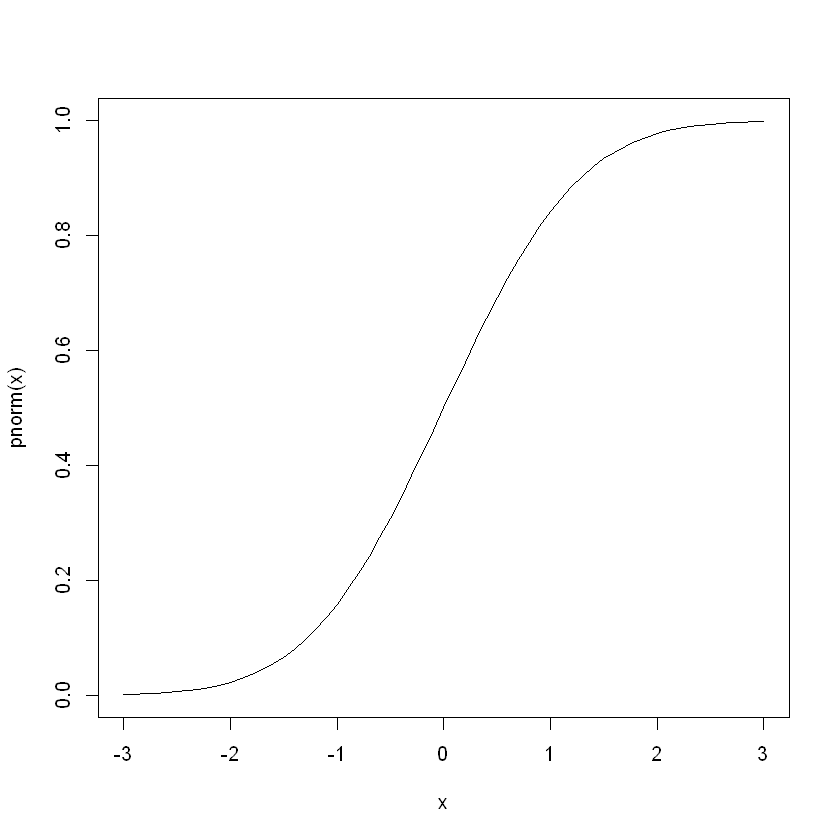

In [41]:
# Transformation in R
# Listing 7.1
# Last updated 2011
#
#

x=seq(-3,3,by=0.1)
plot(x,pnorm(x),type="l")

In [42]:
# Various RNs in R
# Listing 7.3
# Last updated 2011
#
#

set.seed(12) # set seed

S=10
runif(S)
rnorm(S)
rt(S,4)

[1] 0.069360916 0.817775199 0.942621732 0.269381876 0.169348123 0.033895622
 [7] 0.178785004 0.641665366 0.022877743 0.008324827

[1] -0.27229604 -0.31534871 -0.62825524 -0.10646388  0.42801480 -0.77771958
 [7] -1.29388230 -0.77956651  0.01195176 -0.15241624

[1] -0.5468652  0.3257662 -0.3103448  1.6401196 -0.6006579 -0.5043973
 [7]  0.1466749  0.4216070 -1.1096902  0.6741022

In [43]:
# Price bond in R
# Listing 7.5
# Last updated August 2016
#
#

yield=c(5.00, 5.69, 6.09, 6.38, 6.61,
        6.79, 6.94, 7.07, 7.19, 7.30) # yield curve
TT=length(yield)
r=0.07                                # initial yield rate
Par=10                                # par value
coupon=r*Par                          # coupon payments
cc=1:10*0+coupon                      # vector of cash flows
cc[10]=cc[10]+Par                     # add par to cash flows
P=sum(cc/((1+yield/100)^(1:TT)))      # calculate price

print(P)

[1] 9.913206


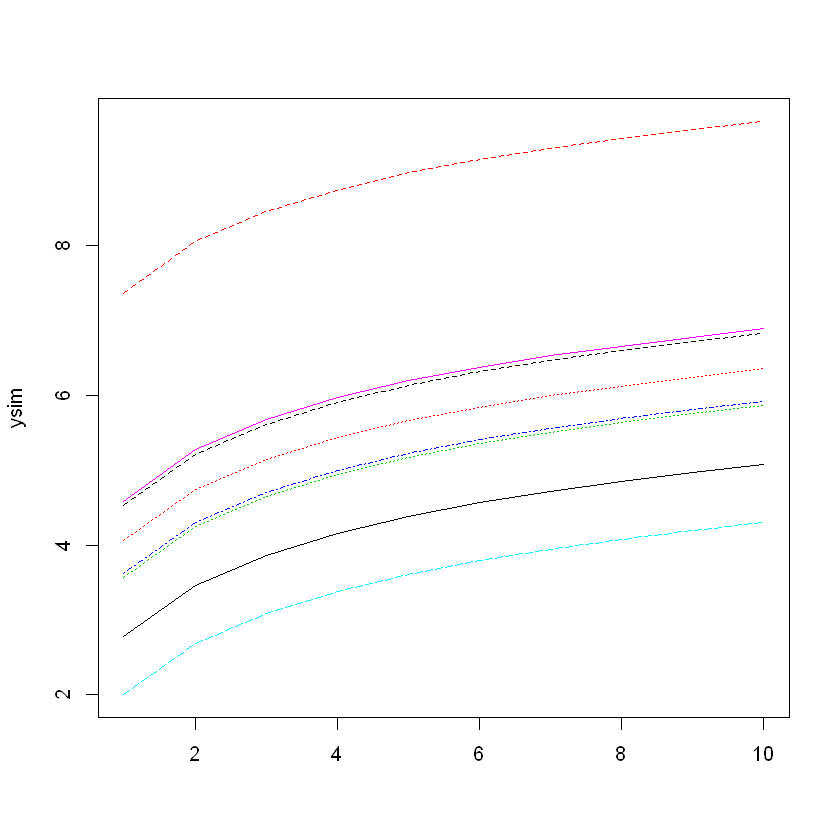

In [44]:
# Simulate yields in R
# Listing 7.7
# Last updated August 2016
#
#

set.seed(12)                         # set seed

sigma = 1.5                          # daily yield volatiltiy
S = 8                                # number of simulations
r = rnorm(S,0,sigma)                 # generate random numbers 
ysim = matrix(nrow=TT,ncol=S)
for (i in 1:S) ysim[,i]=yield+r[i]
matplot(ysim,type='l')

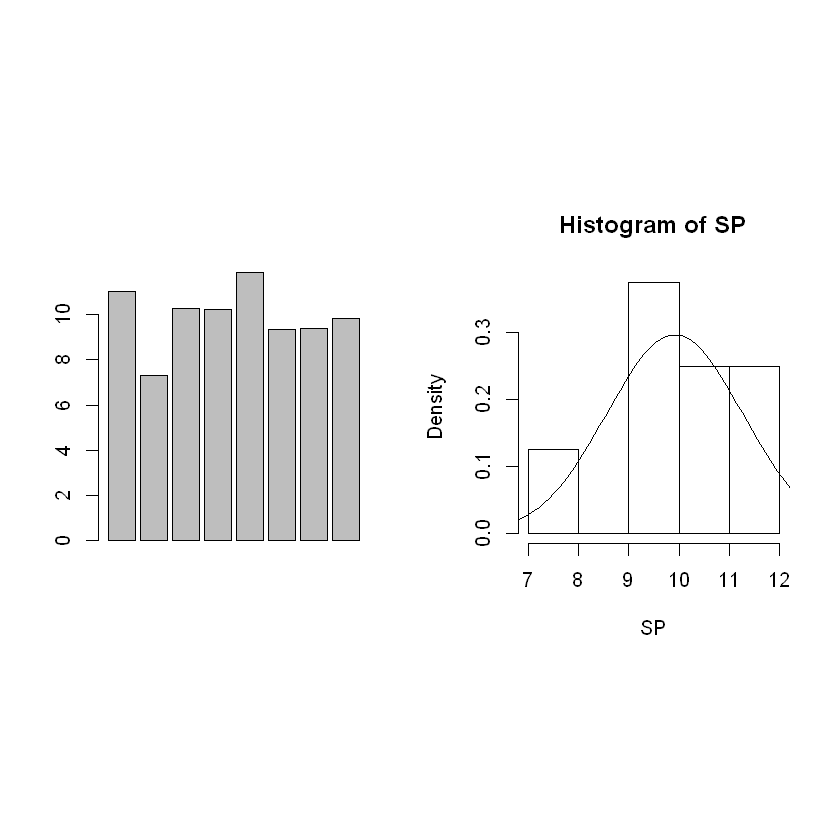

In [45]:
# Simulate bond prices in R
# Listing 7.9
# Last updated August 2016
#
#

SP = vector(length=S)
for (i in 1:S){                            # S simulations
  SP[i] = sum(cc/((1+ysim[,i]/100)^(TT)))
}
SP = SP-(mean(SP) - P)                     # correct for mean

par(mfrow=c(1,2), pty="s")

barplot(SP)

hist(SP,probability=TRUE)
x=seq(6,16,length=100)
lines(x, dnorm(x, mean = mean(SP), sd = sd(SP)))

In [46]:
# Black-Scholes valuation in R
# Listing 7.11
# Last updated August 2016
#
#

P0 = 50                          # initial spot price
sigma = 0.2                      # annual volatility
r = 0.05                         # annual interest
TT = 0.5                         # time to expiration
X = 40                           # strike price
f = bs(X,P0,r,sigma,TT)          # analytical call price
## this calculation uses the Black-Scholes pricing function (Listing 6.1/6.2)

print(f)

$Call
[1] 11.08728

$Put
[1] 0.09967718

$Delta.Call
[1] 0.9660259

$Delta.Put
[1] -0.03397407

$Gamma
[1] 0.01066378



In [47]:
# Black-Scholes simulation in R
# Listing 7.13
# Last updated August 2016
#
#

set.seed(12)                      # set seed

S = 1e6                           # number of simulations
F = P0*exp(r*TT)                  # futures price
ysim = rnorm(S,-0.5*sigma^2*TT,sigma*sqrt(TT)) # sim returns, lognorm corrected
F=F*exp(ysim)                     # sim futures price
SP = F-X                          # payoff
SP[SP<0] = 0                      # set negative outcomes to zero
fsim = SP*exp(-r*TT)              # discount
call_sim = mean(fsim)             # simulated price

print(call_sim)

[1] 11.08709


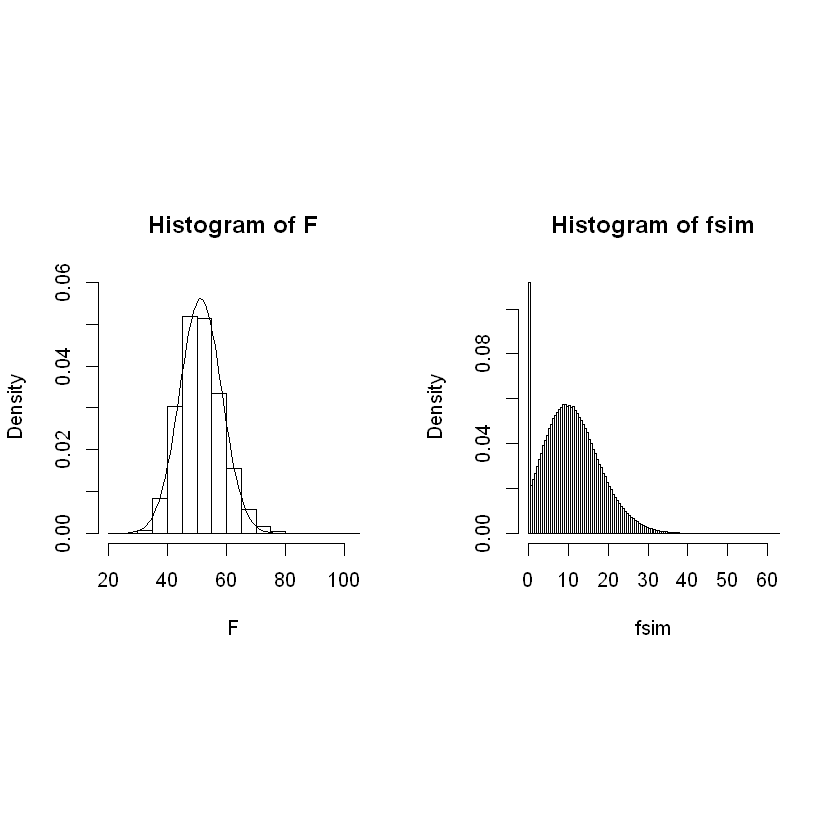

In [48]:
# Option density plots in R
# Listing 7.15
# Last updated 2011
#
#

par(mfrow=c(1,2), pty="s")

hist(F,probability=TRUE,ylim=c(0,0.06))

x=seq(min(F),max(F),length=100)
lines(x, dnorm(x, mean = mean(F), sd = sd(SP)))
hist(fsim,nclass=100,probability=TRUE)

In [49]:
# Simulate VaR in R
# Listing 7.17
# Last updated 2011
#
#

set.seed(1)                 # set seed

S = 1e7                     # number of simulations
s2 = 0.01^2                 # daily variance
p = 0.01                    # probability
r = 0.05                    # annual riskfree rate
P = 100                     # price today
ysim = rnorm(S,r/365-0.5*s2,sqrt(s2)) # sim returns
Psim = P*exp(ysim) # sim future prices
q = sort(Psim-P) # simulated P/L
VaR1 = -q[p*S]

print(VaR1)

[1] 2.289809


In [50]:
# Simulate option VaR in R
# Listing 7.19
# Last updated August 2016
#
#

TT = 0.25;                             # time to expiration
X = 100;                               # strike price
sigma = sqrt(s2*250);                  # annual volatility
f = bs(X,P,r,sigma,TT)                 # analytical call price
fsim = bs(X,Psim,r,sigma,TT-(1/365))   # sim option prices 
q = sort(fsim$Call-f$Call)             # simulated P/L
VaR2 = -q[p*S]

print(VaR2)

[1] 1.214623


In [51]:
# Example 7.3 in R
# Listing 7.21
# Last updated August 2016
#
#

X1 = 100                                 
X2 = 110                                 
f1 = bs(X1,P,r,sigma,TT)                 
f2 = bs(X2,P,r,sigma,TT)                 
f2sim = bs(X2,Psim,r,sigma,TT-(1/365))
f1sim = bs(X1,Psim,r,sigma,TT-(1/365))
q = sort(f1sim$Call+f2sim$Put+Psim-f1$Call-f2$Put-P); 
VaR3 = -q[p*S]

print(VaR3)

[1] 1.494695


In [52]:
# Simulated two-asset returns in R
# Listing 7.23
# Last updated 2011
#
#

library (MASS)

set.seed(12)  # set seed

mu = c(r/365,r/365)                               # return mean
Sigma = matrix(c(0.01,0.0005,0.0005,0.02),ncol=2) # covariance matrix
y = mvrnorm(S,mu,Sigma)  # simulated returns

In [53]:
# Two-asset VaR in R
# Listing 7.25
# Last updated 2011
#
#

K=2
P = c(100,50)                                 # prices
x = c(1,1)                                    # number of assets
Port = P %*% x                                # portfolio at t
Psim = matrix(t(matrix(P,K,S)),ncol=K)*exp(y) # simulated prices
PortSim = Psim %*% x                          # simulated portfolio value
q = sort(PortSim-Port[1,1])                   # simulated P/L
VaR4 = -q[S*p]

print(VaR4)

[1] 25.96307


In [54]:
# A two-asset case in R with an option
# Listing 7.27
# Last updated August 2016
#
#

f = bs(P[2],P[2],r,sigma,TT)
fsim = bs(P[2],Psim[,2],r,sigma,TT-(1/365))
q = sort(fsim$Call+Psim[,1]-f$Call-P[1]); 
VaR5 = -q[p*S]

print(VaR5)

[1] 20.79232


# Chapter 8: Backtesting and Stress Testing

-  8.1: Loading hypothetical stock prices, converting to returns
-  8.3: Setting up backtest 
-  8.5: Running backtest for EWMA/MA/HS/GARCH VaR
-  8.7: Backtesting analysis for EWMA/MA/HS/GARCH VaR
-  8.9: Bernoulli coverage test
-  8.11: Independence test
-  8.13: Running Bernoulli/Independence test on backtests
-  8.15: Running backtest for EWMA/HS ES
-  8.17: Backtesting analysis for EWMA/HS ES

In [55]:
# Load data in R
# Listing 8.1
# Last updated August 2016
#
#

library(tseries)
library(zoo)

p = zoo(read.csv('index.csv',header=TRUE,sep=','))
y=diff(log(p)) # get returns 
y=coredata(y)  # strip date information

In [56]:
# Set backtest up in R
# Listing 8.3
# Last updated August 2016
#
#

TT = length(y)               # number of obs for y
WE = 1000                    # estimation window length
p = 0.01                     # probability
l1 = WE*p                    # HS observation
value = 1;                   # portfolio value
VaR = matrix(nrow=TT,ncol=4) # matrix for forecasts
## EWMA setup
lambda = 0.94;       
s11 = var(y[1:30]);
for(t in 2:WE) s11=lambda*s11+(1-lambda)*y[t-1]^2

library(fGarch)

In [57]:
# Running backtest in R
# Listing 8.5
# Last updated August 2016
#
#

for (t in (WE+1):TT){
  t1 = t-WE;         # start of the data window
  t2 = t-1;	         # end of the data window
  window = y[t1:t2]  # data for estimation
  
  s11=lambda*s11+(1-lambda)*y[t-1]^2
  VaR[t,1] = -qnorm(p) * sqrt(s11) * value          # EWMA
  
  VaR[t,2] = - sd(window) * qnorm(p)*value          # MA
  
  ys = sort(window)                              
  VaR[t,3] = -ys[l1]*value                          # HS
  
  g=garchFit(formula=~garch(1,1),window,
             trace=FALSE,include.mean=FALSE)
  par=g@fit$matcoef
  s4=par[1]+par[2]*window[WE]^2+par[3]*g@h.t[WE]
  VaR[t,4] = -qnorm(p) * sqrt(s4) * value           # GARCH(1,1)
}

1 VR 2.074423 VaR vol 0.01211406 
2 VR 1.860565 VaR vol 0.006622265 
3 VR 1.240376 VaR vol 0.01229172 
4 VR 1.668092 VaR vol 0.01175914 


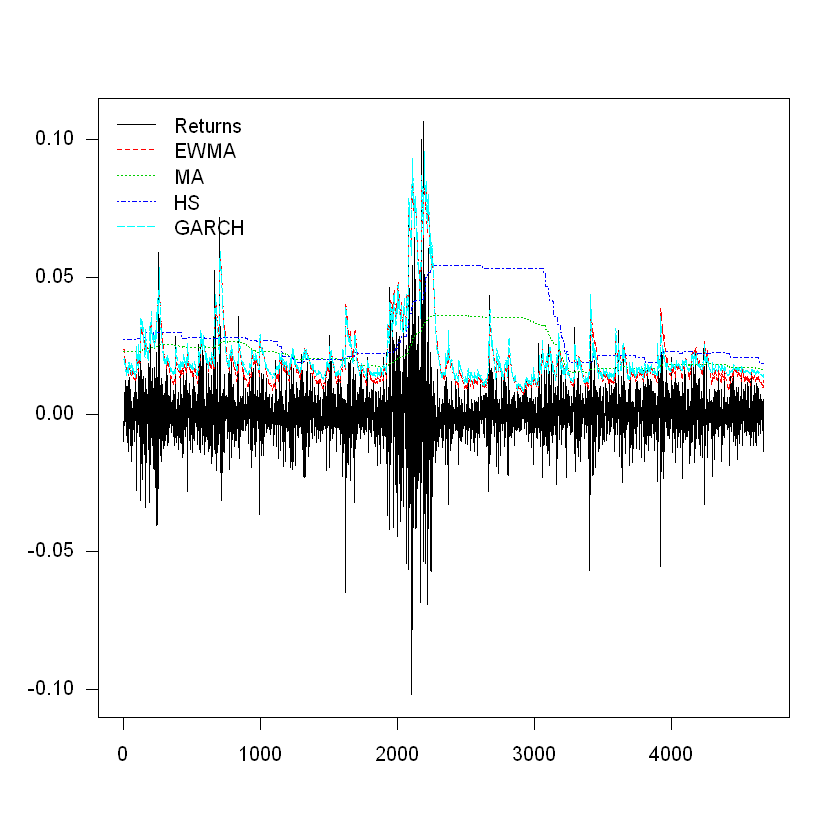

In [58]:
# Backtesting analysis in R
# Listing 8.7
# Last updated June 2018
#
#

W1=WE+1
for (i in 1:4){
  VR = sum(y[W1:TT]< -VaR[W1:TT,i])/(p*(TT-WE))
  s = sd(VaR[W1:TT,i])
  cat(i,"VR",VR,"VaR vol",s,"\n")
}
matplot(cbind(y[W1:TT],VaR[W1:TT,]),type='l',col=1:5,las=1,ylab="",lty=1:5)
legend("topleft",legend=c("Returns","EWMA","MA","HS","GARCH"),lty=1:5,col=1:5,bty="n")

In [59]:
# Bernoulli coverage test in R
# Listing 8.9
# Last updated August 2016
#
#

bern_test=function(p,v){
  lv=length(v)
  sv=sum(v)
  
  al=log(p)*sv+log(1-p)*(lv-sv)
  bl=log(sv/lv)*sv +log(1-sv/lv)*(lv-sv)
  return(-2*(al-bl))
}

In [60]:
# Independence test in R
# Listing 8.11
# Last updated June 2018
#
#

ind_test=function(V){
  J=matrix(ncol=4,nrow=length(V))
  for (i in 2:length(V)){
    J[i,1]=V[i-1]==0 & V[i]==0
    J[i,2]=V[i-1]==0 & V[i]==1
    J[i,3]=V[i-1]==1 & V[i]==0
    J[i,4]=V[i-1]==1 & V[i]==1
  }
  V_00=sum(J[,1],na.rm=TRUE)
  V_01=sum(J[,2],na.rm=TRUE)
  V_10=sum(J[,3],na.rm=TRUE)
  V_11=sum(J[,4],na.rm=TRUE)
  p_00=V_00/(V_00+V_01)
  p_01=V_01/(V_00+V_01)
  p_10=V_10/(V_10+V_11)
  p_11=V_11/(V_10+V_11)
  hat_p=(V_01+V_11)/(V_00+V_01+V_10+V_11)
  al = log(1-hat_p)*(V_00+V_10) + log(hat_p)*(V_01+V_11)
  bl = log(p_00)*V_00 + log(p_01)*V_01 + log(p_10)*V_10 + log(p_11)*V_11
  return(-2*(al-bl))
}

In [61]:
# Backtesting S&P 500 in R
# Listing 8.13
# Last updated August 2016
#
#

W1=WE+1
ya=y[W1:TT]
VaRa=VaR[W1:TT,]
m=c("EWMA","MA","HS","GARCH")
for (i in 1:4){
  q= y[W1:TT]< -VaR[W1:TT,i]
  v=VaRa*0
  v[q,i]=1
  ber=bern_test(p,v[,i])
  ind=ind_test(v[,i])
  cat(i,m[i],'Bernoulli',ber,1-pchisq(ber,1),"independence",ind,1-pchisq(ind,1),"\n")
}

1 EWMA Bernoulli 41.6257 1.105309e-10 independence 0.4411056 0.5065893 
2 MA Bernoulli 27.90392 1.27491e-07 independence 17.44182 2.962367e-05 
3 HS Bernoulli 2.535439 0.1113159 independence 11.48482 0.0007016709 
4 GARCH Bernoulli 17.55348 2.793385e-05 independence 0.33451 0.5630154 


In [62]:
# Backtest ES in R
# Listing 8.15
# Last updated August 2016
#
#

VaR = matrix(nrow=TT,ncol=2) # VaR forecasts for 2 models
ES = matrix(nrow=TT,ncol=2) # ES forecasts for 2 models
for (t in (WE+1):TT){
  t1 = t-WE;
  t2 = t-1;
  window = y[t1:t2]
  
  s11 = lambda * s11  + (1-lambda) * y[t-1]^2 
  VaR[t,1] = -qnorm(p) * sqrt(s11) * value  # EWMA
  ES[t,1] = sqrt(s11) * dnorm(qnorm(p)) / p
  
  ys = sort(window)
  VaR[t,2] = -ys[l1]*value                  # HS
  ES[t,2] = -mean(ys[1:l1]) * value
}

In [63]:
# Backtest ES in R
# Listing 8.17
# Last updated August 2016
#
#

ESa = ES[W1:TT,]
VaRa = VaR[W1:TT,]
for (i in 1:2){
  q = ya <= -VaRa[,i]
  nES = mean(ya[q] / -ESa[q,i])
  cat(i,"nES",nES,"\n")
}

1 nES 1.223518 
2 nES 1.053689 


# Chapter 9: Extreme Value Theory

-  9.1: Calculation of tail index from returns

In [64]:
# Hill estimator in R
# Listing 9.1
# Last updated 2011
#
#

ysort = sort(y)                             # sort the returns
CT = 100                                    # set the threshold
iota = 1/mean(log(ysort[1:CT]/ysort[CT+1])) # get the tail index

print(iota)

# END

[1] 2.62971
